In [10]:
import pandas as pd
import datetime as dt
import string
import seaborn
import matplotlib.pyplot as plt
from seaborn.categorical import barplot

In [21]:
data = pandas.read_csv('energy_use_in_the_UK.csv', sep=' ;')
data.columns

# le tableau contient une unique colonne ce qui empeche de traiter les données, on définit donc un séparateur


,timestamp,coal,nuclear,wind,hydro,solar
0,2012-01-01 00:00:01,8693,7121,2740,728,0.0
1,2012-01-01 00:05:06,8650,7120,2812,732,0.0
2,2012-01-01 00:10:01,8880,7125,2896,744,0.0
3,2012-01-01 00:15:01,9111,7122,2964,748,0.0
4,2012-01-01 00:20:01,9195,7114,2992,750,0.0


<AxesSubplot:>

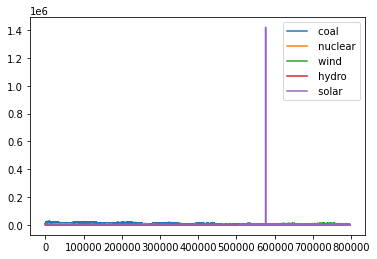

In [19]:
# On affiche le graph
data.plot()

In [35]:
# le nom de toutes les colonnes possède un espace au debut des colonnes, on va s'en debarasser

data.rename(columns={" timestamp": "timestamp", " coal": "coal"," nuclear": "nuclear"," wind": "wind"," hydro": "hydro"," solar": "solar"})

,timestamp,coal,nuclear,wind,hydro,solar
0,2012-01-01 00:00:01,8693,7121,2740,728,0.0
1,2012-01-01 00:05:06,8650,7120,2812,732,0.0
2,2012-01-01 00:10:01,8880,7125,2896,744,0.0
3,2012-01-01 00:15:01,9111,7122,2964,748,0.0
4,2012-01-01 00:20:01,9195,7114,2992,750,0.0
...,...,...,...,...,...,...
796448,2019-08-03 19:50:34,0,5466,687,408,119.0
796449,2019-08-03 19:55:37,0,5435,685,407,122.0
796450,2019-08-03 20:00:39,0,5404,682,405,127.0
796451,2019-08-03 20:05:34,0,5380,689,389,11.5


In [34]:
# On essaye d'interpoler les valeurs manquantes ou abbérantes toutes les 5min

In [ ]:
# On choisit la bonne représentation